In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
import os 
import re

In [2]:
df_regions=pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/Selected subjects/For each subject/Evaluation_metrics_with_v4/Quantile for each subject/List_of_regions")

In [3]:
df_regions

,Unnamed: 0,index_subject,list of regions
0,0,5,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'), ('S..."
1,1,6,"[('S.Call.-S.s.P.-S.intraCing.', 'L'), ('S.s.P..."
2,2,14,"[('S.T.i.-S.T.s.-S.T.pol.', 'L'), ('S.T.i.-S.O..."
3,3,16,"[('F.Coll.-S.Rh.', 'L'), ('S.T.i.-S.T.s.-S.T.p..."
4,4,17,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'), ('S..."
...,...,...,...
114,114,685,"[('S.Call.', 'L'), ('S.Call.-S.s.P.-S.intraCin..."
115,115,690,"[('S.Po.C.', 'L'), ('S.C.-S.Po.C.', 'L'), ('F...."
116,116,694,"[('S.T.i.-S.T.s.-S.T.pol.', 'L'), ('Lobule_par..."
117,117,699,"[('S.F.median-S.F.pol.tr.-S.F.sup.', 'R'), ('S..."


In [4]:
auc_value=[]

In [5]:
dir_path = "/neurospin/tmp/fred/models/2025-11-10"

In [6]:
def find_subfolder_starting_with(c, c2):
    for name in os.listdir(c):
        full_path = os.path.join(c, name)
        if os.path.isdir(full_path) and name.startswith(c2):
            return full_path
    return None

In [7]:

selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

In [8]:
import ast

In [9]:
for i in df_regions["index_subject"]:
    print(i)

    y_true=[]
    global_score=[]

    L=df_regions.loc[df_regions["index_subject"] == i, "list of regions"].iloc[0]
    L = ast.literal_eval(L)

    ROI=[] #Regions Of Interest

    for all_region in L:
        
        side =all_region[1]
        region= all_region[0]

        region= region.replace(".","")

        if side=='L':
            region= region + "_left"
        if side=='R':
            region= region + "_right"

        dir_region = find_subfolder_starting_with(dir_path, region) #The path to the corresponding region

        ROI.append(dir_region)

    for subdir in os.listdir(dir_path):

        path_subdir=os.path.join(dir_path, subdir)

        if path_subdir in ROI:
            y_true.append(1)
        else:
            y_true.append(0)

        entropy_path = os.path.join(dir_path,subdir,"PEPR_Marseille", "Quantiles_Reconstruction_error.csv")
        chamfer_path = os.path.join(dir_path, subdir, "PEPR_Marseille", "Quantiles_Chamfer_distance.csv")
        SVM_path = os.path.join(dir_path,subdir, "PEPR_Marseille", "Quantiles_Residualisation_Score_SVM.csv")

        entropy_PEPR= pd.read_csv(entropy_path)
        chamfer_PEPR= pd.read_csv(chamfer_path)
        SVM_PEPR= pd.read_csv(SVM_path)

        entropy_PEPR= entropy_PEPR.loc[selected_index].reset_index(drop=True)
        chamfer_PEPR=chamfer_PEPR.loc[selected_index].reset_index(drop=True)
        SVM_PEPR=SVM_PEPR.loc[selected_index].reset_index(drop=True)

        values=np.array([entropy_PEPR.iloc[i,-1], chamfer_PEPR.iloc[i,-1], SVM_PEPR.iloc[i,-1]])
        global_score.append(np.mean(values))

    auc_value.append(roc_auc_score(y_true,global_score))

5
6
14
16
17
18
37
44
47
60
62
63
64
72
73
78
79
82
87
88
90
92
103
105
106
107
115
125
126
128
131
134
139
150
157
159
166
169
174
175
177
185
193
198
200
210
215
218
224
235
244
249
254
255
269
276
287
297
315
318
319
326
329
352
375
376
382
389
404
406
408
417
428
432
433
448
458
464
465
468
469
487
496
499
507
514
515
521
523
524
525
528
541
545
556
557
558
568
571
588
593
596
604
611
612
628
633
634
638
639
653
662
672
675
685
690
694
699
706


In [10]:
auc_value=np.array(auc_value)


In [11]:
np.mean(auc_value)

np.float64(0.5488963162547843)

/tmp/ipykernel_1985435/2940899101.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


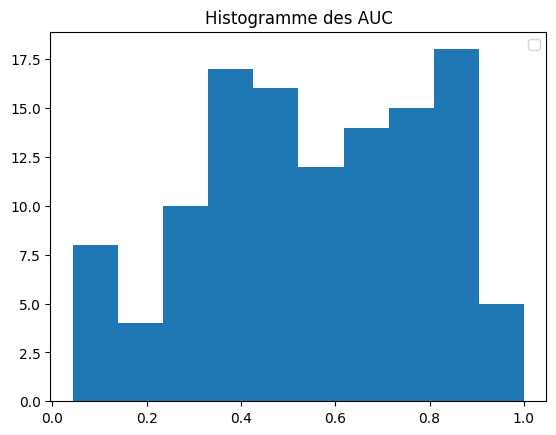

In [12]:
plt.hist(auc_value)
plt.title("Histogramme des AUC")
plt.legend()
plt.show()

Pour les sujets avec Résection

In [13]:
df_PEPR= pd.read_excel("/neurospin/dico/data/human/PEPR_Marseille/PourTheotime.ods", engine="odf")


In [14]:
df_cross_entropy = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Reconstruction_error.csv")

In [15]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

In [16]:
selected_index_1 = []

In [17]:


for a in df_cross_entropy.iloc[:, 0]:
    if a=="0109GRE_10102016":
        selected_index_1.append(978)
    if a=="0109GRE_12112016":
        selected_index_1.append(979)
    if a=="0164ROT_29012018":
        selected_index_1.append(1158)
    if a=="0168ROT_01032018":
        selected_index_1.append(1172)
    if a=="0168ROT_17092018":
        selected_index_1.append(1173)

    id = a[:7]

    matches = df_PEPR.index[df_PEPR.iloc[:, 0].str[:7] == id]
    if len(matches) == 1:
        selected_index_1.append(matches[0])
    else:
        #print(len(matches))
        j=0
        for i in matches:
            c= len(df_PEPR.iloc[i, 0])
            if c==9:
                id  = a[:7] + a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==11:
                id = a[:7]+ a[10:12]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==10:
                id = a[:7]+ a[11]+a[-2:]
                if df_PEPR.iloc[i, 0]==id:
                    selected_index_1.append(i)
                    j+=1
            elif c==7:
                selected_index_1.append(747)
                j+=1
selected_index_1= np.array(selected_index_1)

In [18]:
df_PEPR= df_PEPR.loc[selected_index_1].reset_index(drop=True) #1 ere sélection
df_PEPR= df_PEPR.loc[selected_index].reset_index(drop=True) #2e sélection


In [19]:
idx = df_PEPR.index[df_PEPR["Lesion type"].str.endswith("Resection", na=False)]


In [20]:
idx2 = df_regions.index[df_regions["index_subject"].isin(idx)].to_numpy()


In [21]:
auc_Resection=auc_value[idx2]

In [22]:
np.mean(auc_Resection)

np.float64(0.5304033494960866)

/tmp/ipykernel_1985435/3143858370.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


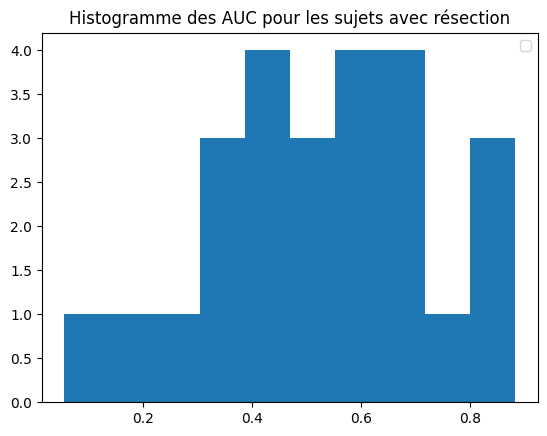

In [23]:
plt.hist(auc_Resection)
plt.title("Histogramme des AUC pour les sujets avec résection")
plt.legend()
plt.show()

Pour les sujets avec Polymicrogyrie

In [24]:
idx = df_PEPR.index[df_PEPR["Lesion type"].str.endswith("Polymicrogyria", na=False)]


In [25]:
idx3 = df_regions.index[df_regions["index_subject"].isin(idx)].to_numpy()


In [26]:
auc_polymicrogyrie=auc_value[idx3]


In [27]:
np.mean(auc_polymicrogyrie)

np.float64(0.46251885369532425)

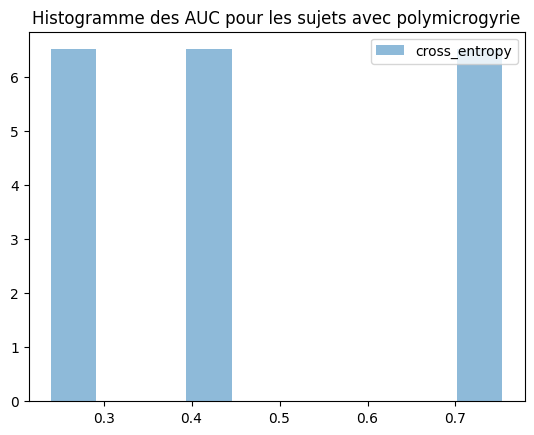

In [28]:
plt.hist(auc_polymicrogyrie, density=True, alpha=0.5, label="cross_entropy")
plt.title("Histogramme des AUC pour les sujets avec polymicrogyrie")
plt.legend()
plt.show()